In [36]:
import pandas as pd
import numpy as np

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split

import joblib ## for model exportation
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score




In [37]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

df = pd.read_csv("cleaned_data.csv", low_memory=False)
df

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit-Builder Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,1.0,809.98,26.822620,265.0,49.574949,80.415295,312.494089,2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
1,23.0,19114.12,3095.978333,3.0,4.0,3.0,4.0,-1.0,14.0,11.27,4.0,2.0,809.98,31.944960,219.0,49.574949,118.280222,284.629162,2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
2,23.0,19114.12,3095.978333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,2.0,809.98,31.377862,268.0,49.574949,199.458074,223.451310,2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,14.0,11.27,4.0,2.0,809.98,24.797347,269.0,49.574949,41.420153,341.489231,2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0
4,23.0,19114.12,3095.978333,3.0,4.0,3.0,4.0,8.0,4.0,9.27,4.0,2.0,809.98,27.262259,270.0,49.574949,62.430172,340.479212,2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97219,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,11.50,3.0,1.0,502.38,34.663572,378.0,35.104023,60.971333,479.866228,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0
97220,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,11.50,3.0,1.0,502.38,40.565631,379.0,35.104023,54.185950,496.651610,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
97221,25.0,39628.99,3359.415833,4.0,6.0,13.0,2.0,27.0,6.0,11.50,3.0,2.0,502.38,41.255522,380.0,35.104023,24.028477,516.809083,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0
97222,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,14.0,11.50,3.0,2.0,502.38,33.638208,381.0,35.104023,251.672582,319.164979,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97224 entries, 0 to 97223
Data columns (total 50 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Age                                                 97224 non-null  float64
 1   Annual_Income                                       97224 non-null  float64
 2   Monthly_Inhand_Salary                               97224 non-null  float64
 3   Num_Bank_Accounts                                   97224 non-null  float64
 4   Num_Credit_Card                                     97224 non-null  float64
 5   Interest_Rate                                       97224 non-null  float64
 6   Num_of_Loan                                         97224 non-null  float64
 7   Delay_from_due_date                                 97224 non-null  float64
 8   Num_of_Delayed_Payment                              97224 non-null  float64


In [39]:
X, y = df.drop("Credit_Score",axis=1).values , df["Credit_Score"] 

In [40]:
X[1]

array([ 2.30000000e+01,  1.91141200e+04,  3.09597833e+03,  3.00000000e+00,
        4.00000000e+00,  3.00000000e+00,  4.00000000e+00, -1.00000000e+00,
        1.40000000e+01,  1.12700000e+01,  4.00000000e+00,  2.00000000e+00,
        8.09980000e+02,  3.19449601e+01,  2.19000000e+02,  4.95749492e+01,
        1.18280222e+02,  2.84629162e+02,  1.00000000e+00,  1.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
        0.00000000e+00])

In [41]:
rus = SMOTE(sampling_strategy='auto')
X_data_rus, y_data_rus = rus.fit_resample(X, y)
y_data_rus.value_counts(normalize=True)

2    0.333333
1    0.333333
0    0.333333
Name: Credit_Score, dtype: float64

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_data_rus, y_data_rus, test_size=0.2, random_state=42, stratify=y_data_rus)
scalar = PowerTransformer(method="yeo-johnson", standardize=True).fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)


In [43]:
joblib.dump(scalar, 'scalar.pkl')


['scalar.pkl']

In [6]:
import os

# Get the current working directory
current_dir = os.getcwd()

# Define the path to the trained model folder relative to the current directory
model_folder = os.path.join(current_dir, 'trained model')

# Load models using relative paths
BaseSGD = joblib.load(os.path.join(model_folder, 'sgd_classifier_model.pkl'))

KNN = joblib.load(os.path.join(model_folder, 'knn_model.pkl'))
RF = joblib.load(os.path.join(model_folder, 'RandomForest.pkl'))
XGB = joblib.load(os.path.join(model_folder, 'XGB.pkl'))
HistGradientBoosting = joblib.load(os.path.join(model_folder, 'HistGradientBoosting.pkl'))
ExtraTrees = joblib.load(os.path.join(model_folder, 'ExtraTrees.pkl'))
BaseSGD = joblib.load(os.path.join(model_folder, 'sgd_classifier_model.pkl'))
BaggingModel = joblib.load(os.path.join(model_folder, 'BaggingModel.pkl'))
LinearSVC = joblib.load(os.path.join(model_folder, 'linear_svc_model.pkl'))

train_scores = []
test_scores = []
cv_scores = []

# Define a function to compute train, test, and cross-validation scores
def compute_scores(model, X_train, y_train, X_test, y_test):
    # Train the model
    #model.fit(X_train, y_train)
    
    # Calculate train accuracy
    train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_scores.append(train_accuracy)
    
    # Calculate test accuracy
    test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_scores.append(test_accuracy)
    
    # Calculate cross-validation score
    cv_accuracy = cross_val_score(model, X_train, y_train, cv=5, n_jobs=-1).mean()
    cv_scores.append(cv_accuracy)

# Iterate through each model and compute scores
models = [BaseSGD, KNN, RF, XGB, HistGradientBoosting, ExtraTrees, BaggingModel, LinearSVC]
model_names = ['Base SGD', 'KNN', 'Random Forest', 'XGBoost', 'HistGradientBoosting', 'Extra Trees', 'Bagging', 'LinearSVC']

for model, name in zip(models, model_names):
    compute_scores(model, X_train, y_train, X_test, y_test)



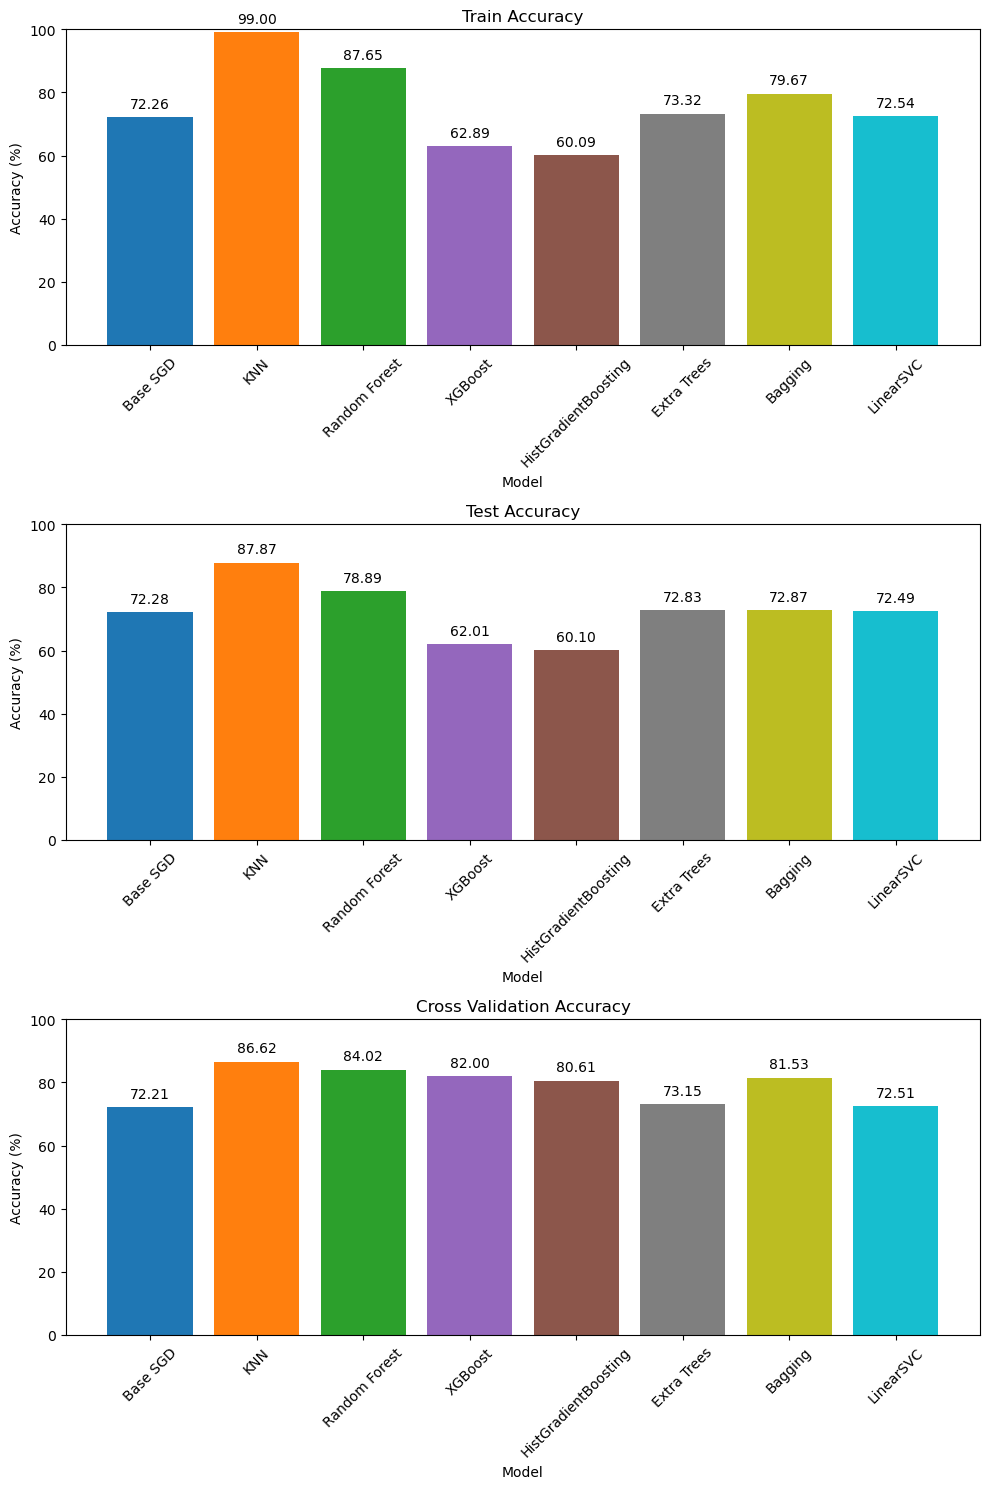

In [7]:
import numpy as np

# Plot the results
plt.figure(figsize=(10, 15))

# Define colors for the bars
colors = plt.cm.tab10(np.linspace(0, 1, len(model_names)))

# Train accuracy bar graph
plt.subplot(3, 1, 1)
bars = plt.bar(model_names, [score * 100 for score in train_scores], color=colors)
plt.title('Train Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)
for bar, score in zip(bars, train_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, f'{score * 100:.2f}', ha='center', va='bottom')

# Test accuracy bar graph
plt.subplot(3, 1, 2)
bars = plt.bar(model_names, [score * 100 for score in test_scores], color=colors)
plt.title('Test Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)
for bar, score in zip(bars, test_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, f'{score * 100:.2f}', ha='center', va='bottom')

# Cross-validation accuracy bar graph
plt.subplot(3, 1, 3)
bars = plt.bar(model_names, [score * 100 for score in cv_scores], color=colors)
plt.title('Cross Validation Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=45)
plt.ylim(0, 100)
for bar, score in zip(bars, cv_scores):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, f'{score * 100:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [10]:
base_models = [('KNN', KNN),
               ('RF', RF),
               ('XGB', XGB),
               ('HistGradientBoosting', HistGradientBoosting),
               ('BaggingModel', BaggingModel)]


# base_models = [('RF', RF),
#                ('XGB', XGB),
#                ('HistGradientBoosting', HistGradientBoosting)]

meta_learner = LogisticRegression(max_iter=1000)

# Define the stacking classifier
stacking_clf = StackingClassifier(estimators=base_models,
                                   final_estimator=meta_learner,
                                   cv=5, n_jobs=-1)  # Use cross-validation for meta learner training

stacking_clf.fit(X_train, y_train)

train_pred = stacking_clf.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)

# Test accuracy
test_pred = stacking_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, test_pred)

# Cross-validation accuracy
cv_accuracy = cross_val_score(stacking_clf, X_train, y_train, cv=5, n_jobs=-1).mean()

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Cross-Validation Accuracy:", cv_accuracy)

Train Accuracy: 1.0
Test Accuracy: 0.8889318511358144
Cross-Validation Accuracy: 0.8792705080945222


In [11]:
# joblib.dump(stacking_clf, 'stacking_clf_model.pkl')

['stacking_clf_model.pkl']

In [35]:
first_row = df.iloc[[0]]

# Predict using the first row
# stacking_clf.predict(X)
# X.info()

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)